In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 

### xgboost相关包

In [3]:
from sklearn.metrics import mean_squared_error,r2_score

import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [4]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

### 读取数据

In [5]:
def notEmpty(s):
    return s!=''

In [6]:
path = 'datas/boston_housing.data'
fd = pd.read_csv(path,header=None)
fd.head()

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [7]:
data = np.empty((len(fd),14))

for i,d in enumerate(fd.values):
    d = map(float,filter(notEmpty,d[0].split(' ')))
    data[i] = list(d)

In [8]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [14]:
#列名
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

### 构造x,y

In [9]:
x,y = np.split(data,(13,),axis = 1)
y = y.ravel()

In [11]:
x.shape

(506, 13)

In [12]:
y.shape

(506,)

In [15]:
X_DF = pd.DataFrame(x,columns = names)
X_DF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### train 和 test 分割

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=14)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### 数据转换

In [17]:
dtrain  = xgb.DMatrix(x_train,label=y_train)
dtest = xgb.DMatrix(x_test)

NameError: name 'xgb' is not defined

### 指定参数

In [21]:
params = {'max_depth':5,'eta':1,'silent':1,'objective':'reg:linear'}
num_round = 2

### 模型训练

In [22]:
bst = xgb.train(params,dtrain,num_round)

NameError: name 'xgb' is not defined

### 模型固话重新加载

In [ ]:
#固话
bst = xgb.train(params,dtrain,num_round)

In [ ]:
#重新加载
bst2 = xgb.Booster()
bst2.load_model('xgb.model')

### 模型使用

In [ ]:
y_pred2 = bst.predict(dtest)
y_pred = bst.predict(dtest)

### 性能指标

In [23]:
mean_squared_error(y_test,y_pred2)

NameError: name 'y_pred2' is not defined

In [ ]:
mean_squrared_error(y_test,y_pred)

In [ ]:
r2_score(y_test,y_pred2)

### 可视化

NameError: name 'y_pred' is not defined

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


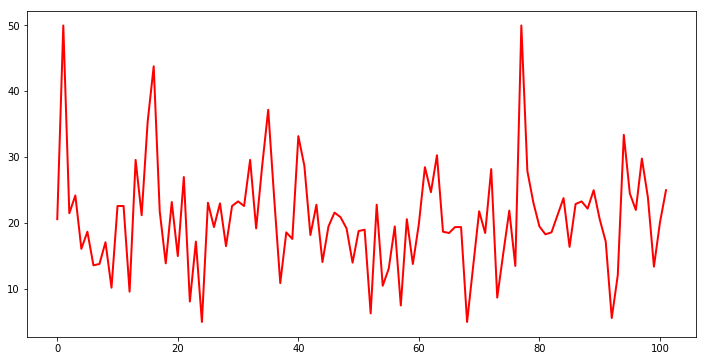

In [24]:
plt.figure(figsize=(12,6),facecolor='w')
ln_x_test = range(len(x_test))

#绘制实际值和预测值
plt.plot(ln_x_test,y_test,'r-',lw=2,label=u'实际值')
plt.plot(ln_x_test,y_pred,'g-',lw=2,label=u'XGBoost预测值')

plt.legend(loc='lower right')
plt.grid(True)
plt.title(u'波士顿房屋租赁')
plt.show()

### 特征重要性

In [25]:
from xgboost import plot_importance

plot_importance(bst,importance_type = 'cover')
plt.show()

ModuleNotFoundError: No module named 'xgboost'